## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
np.random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [436]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [437]:
# see all the values in group
df['group'].unique()

array(['control', 'treatment'], dtype=object)

b. Use the below cell to find the number of rows in the dataset.

In [438]:
num_row = df.shape[0]
print(f"number of rows in the dataset is {num_row}")

number of rows in the dataset is 294478


c. The number of unique users in the dataset.

In [439]:
unique_count = df.nunique()['user_id']
print(f"The number of unique users: {unique_count}")

The number of unique users: 290584


d. The proportion of users converted.

In [440]:
print(f"The proportion of converted users {df['converted'].mean() * 100}%")

The proportion of converted users 11.96591935560551%


e. The number of times the `new_page` and `treatment` don't line up.

In [441]:
# treatment but not new_page AND control but not old_page
misaligned_group_page = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]
misaligned_group_page_c = misaligned_group_page.shape[0]
#print(misaligned_group_page_c)
print(f"Number of times new_page and treatment do not line up: {misaligned_group_page_c}")

Number of times new_page and treatment do not line up: 3893


In [442]:
misaligned_group_page.head()

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


f. Do any of the rows have missing values?

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### There seems to be values in all cells. The following also confirms it.

In [444]:
print(f"There are {df.isnull().any().sum()} missing values")

There are 0 missing values


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [445]:
df2 = df.drop(misaligned_group_page.index)

In [446]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [447]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [448]:
print(f"Number of unique user_ids in df2: {df2['user_id'].nunique()}")

Number of unique user_ids in df2: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [449]:
print("index\tuser_id")
print(f"{df2[df2.duplicated(['user_id'], keep=False)]['user_id']}")

index	user_id
1899    773192
2893    773192
Name: user_id, dtype: int64


### user_id 773192 has 2 entries.

c. What is the row information for the repeat **user_id**? 

In [450]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [451]:
df2.drop(index=2893, inplace=True)

In [452]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [453]:
print(f"probability of converting regardless of page: {df2.converted.mean()}")

probability of converting regardless of page: 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [454]:
# CONTROL group in df2
control_group = df2.query("group == 'control'")
print(f"probability of control converting: {control_group.converted.mean()}")

probability of control converting: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [455]:
# TREATMENT group in df2
treatment_group = df2.query("group == 'treatment'")
print(f"probability of treatment converting: {treatment_group.converted.mean()}")

probability of treatment converting: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [456]:
print(f"probability of receiving new page: {df2[df2['landing_page'] == 'new_page'].count()[0] / df2.shape[0]}")
print(df2.query("landing_page == 'new_page'").count()[0] / df2.shape[0])

probability of receiving new page: 0.5000619442226688
0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

I will have to say for now that the there is not enough evidence that the new treatment page leads to more conversions. In fact, with control's probability of converting at .12 being very close to the general conversion rate of .119 and slightly edging treatment's conversion at probability .118, I would favor the old landing page over the new one, esp that there is a 50% chance of receiving the new page. Without more statistical evidence, it seems that one landing page is as effective or ineffective in conversion as the other -- with scantiest slant towards the old landing page. I will do some simulations below and obtain a p-value and ses if there is some statistical evidence, favoring one or the other landing page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

```
H-null: p_new <= p_old
H-alt: p_new > p_old
```

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [457]:
# Assuming that the converted rate of p_new and p_old are equal
p_new = df2.converted.mean()
print(f"convert rate for p_new under H-null: {p_new}")

convert rate for p_new under H-null: 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [458]:
p_old = df2.converted.mean()
print(f"convert rate for p_old under H-null: {p_old}")

convert rate for p_old under H-null: 0.11959708724499628


### `p_new` and `p_old` are equal to the converted rate in df2.

c. What is $n_{new}$?

In [459]:
# number of individuals in the treatment group
n_new = treatment_group.count()[0]
print(f"number of individuals in the treatment group: {n_new}")

number of individuals in the treatment group: 145310


d. What is $n_{old}$?

In [460]:
# number of individuals in the control group
n_old = control_group.count()[0]
print(f"number of individuals in the control group: {n_old}")

number of individuals in the control group: 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [461]:
# simulation between [0,1], with p-0: (1-p_new), p-1: p_new.
# with P-1 being the successful conversion rate, i.e. converted == True

In [462]:
new_page_converted = np.random.choice([0,1], size=n_new, p=((1-p_new), p_new))

new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [463]:
old_page_converted = np.random.choice([0,1], size=n_old, p=((1-p_old), p_old))

old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [464]:
# p_new and p_old of the simulated values new_page_converted and old_page_converted
p_new_sim = new_page_converted.mean()
p_old_sim = old_page_converted.mean()
obs_diff_sim = p_new_sim - p_old_sim
print(f"observed diff of the simulated values: {obs_diff_sim}")

observed diff of the simulated values: -0.002397302297957274


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

In [465]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice(2, size=n_new, p=((1-p_new), p_new))
    old_page_converted = np.random.choice(2, size=n_old, p=((1-p_old), p_old))
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

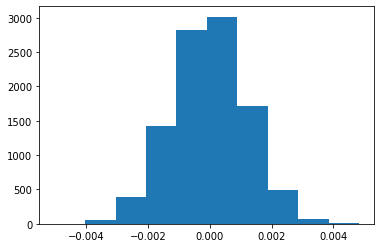

In [466]:
plt.hist(p_diffs);
#plt.axvline(x=obs_diff, color='red')

### The plot looks as I expected. `p_diffs` has a normal distribution given the central limit theorem and the law of large numbers, i.e. big sample size.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

### Calculation of the actual difference observed.

In [467]:
obs_diff = treatment_group.converted.mean() - control_group.converted.mean()
print(f"actual difference observed: {obs_diff}")

actual difference observed: -0.0015782389853555567


In [468]:
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

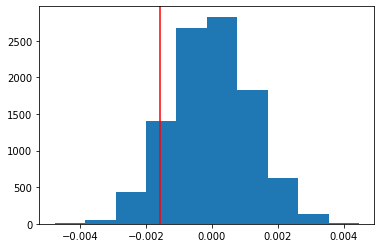

In [469]:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [470]:
p = (null_vals > obs_diff).mean()
p

0.9018

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [ ]:
import statsmodels.api as sm

convert_old = 
convert_new = 
n_old = 
n_new = 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [ ]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [ ]:
### Create the necessary dummy variables

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
### Fit Your Linear Model And Obtain the Results

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.